In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [20]:
N = 1000
std = 0.8

# train data
banana_width = np.random.normal(4, std, N)
banana_length = np.random.normal(8, std, N)

apple_width = np.random.normal(6, std, N)
apple_length = np.random.normal(6, std+0.1, N)

width = np.concatenate((banana_width, apple_width))
length = np.concatenate((banana_length, apple_length))


banana_label = np.zeros(N, dtype='int')
apple_label = np.ones(N, dtype='int')

X = np.array([width, length]).T
Y = np.concatenate((banana_label, apple_label))

#test data
test_banana_width = np.random.normal(4, std, 100)
test_banana_length = np.random.normal(8, std, 100)

test_apple_width = np.random.normal(6, std, 100)
test_apple_length = np.random.normal(6, std+0.1, 100)

test_width = np.concatenate((test_banana_width, test_apple_width))
test_length = np.concatenate((test_banana_length, test_apple_length))


test_banana_label = np.zeros(100, dtype='int')
test_apple_label = np.ones(100, dtype='int')

X_test = np.array([test_width, test_length]).T
Y_test = np.concatenate((test_banana_label, test_apple_label))

Text(0, 0.5, 'Width')

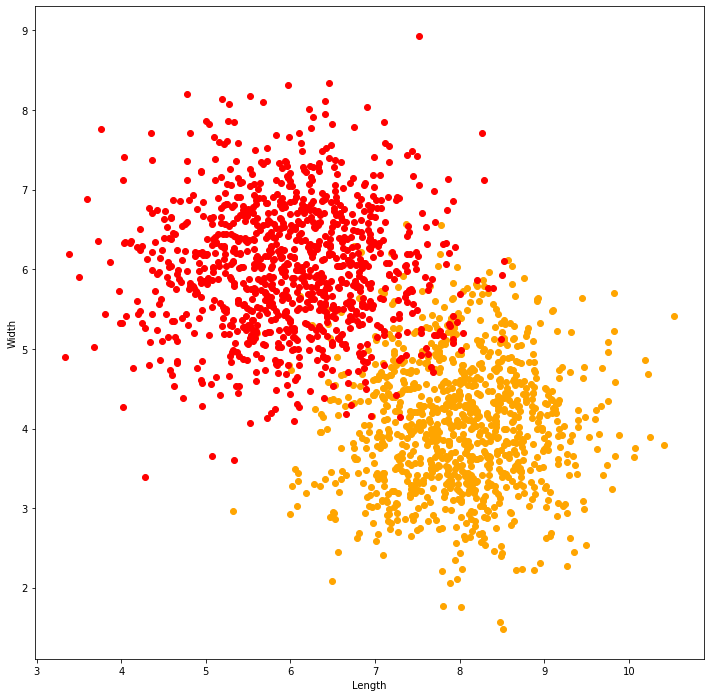

In [21]:
plt.figure(figsize = (12, 12))

plt.scatter(X[0:N, 1], X[0:N, 0], c='orange', label='banana')
plt.scatter(X[N:2*N, 1], X[N:2*N, 0], c='red', label='apple')

plt.xlabel('Length')
plt.ylabel('Width')

In [22]:
class KNearestNeighbors:
    def __init__(self, k):
        self.k = k
        
    #train
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
        self.number_class = len(np.unique(Y_train))
        
    def nearestNeighbors(self, X_test):
        distance = np.sqrt(np.sum((X_test - self.X_train)**2, axis = 1))
        near_neighbor = np.argsort(distance)[0:self.k]
        return near_neighbor
    
    #test
    def predict(self, X_test):
        near_neighbor = self.nearestNeighbors(X_test)
        y = np.argmax(np.bincount(self.Y_train[near_neighbor]))
        return y
    
    def evaluate(self, x_test, y_test):
        y_pred = []
        for i in range(len(x_test)):
          y = knn.predict(x_test[i])
          y_pred.append(y)
        not_correct = abs(sum(y_pred - y_test))
        print((((len(y_pred) - not_correct)*100)/len(y_pred))/100)
            

In [23]:
fruits = { 0: 'موز',
          1: 'سیب'}

knn = KNearestNeighbors(5)
knn.fit(X, Y)
knn.evaluate(X_test, Y_test)
  

1.0


In [24]:
knc = KNeighborsClassifier(5) 
knc.fit(X, Y)
score = knc.score(X_test, Y_test)
score

0.94